In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings

%matplotlib inline

In [74]:
white_wine = pd.read_csv('../Wine Quality/winequality-white.csv', sep = ';')
white_wine.columns = [c.lower().replace(' ', '_') for c in white_wine.columns]

white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [75]:
# colors I will be using in this notebook
Spectral = sns.color_palette("Spectral_r", n_colors=len(white_wine.columns))
dark_yellow = Spectral[7]
light_yellow = Spectral[5]

# ignore warnings
warnings.filterwarnings(action = 'ignore')

In [76]:
# Check for null values
print('White Wine: ')
print(white_wine.isnull().any())

White Wine: 
fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
ph                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [77]:
# start EDA - get shape
print("White Wine Df Dimensions:", white_wine.shape)

White Wine Df Dimensions: (4898, 12)


In [78]:
# get datatypes
print("White Wine datatypes: \n")
print(white_wine.dtypes)

White Wine datatypes: 

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [79]:
# get statistics for white wine target variable
print("White wine 'quality' statistics:")
white_wine['quality'].describe()

White wine 'quality' statistics:


count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

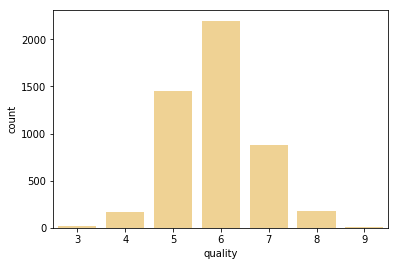

In [80]:
sns.countplot(white_wine['quality'], color =dark_yellow)

Text(0.5,1,'Correlation Heatmap for White Wine')

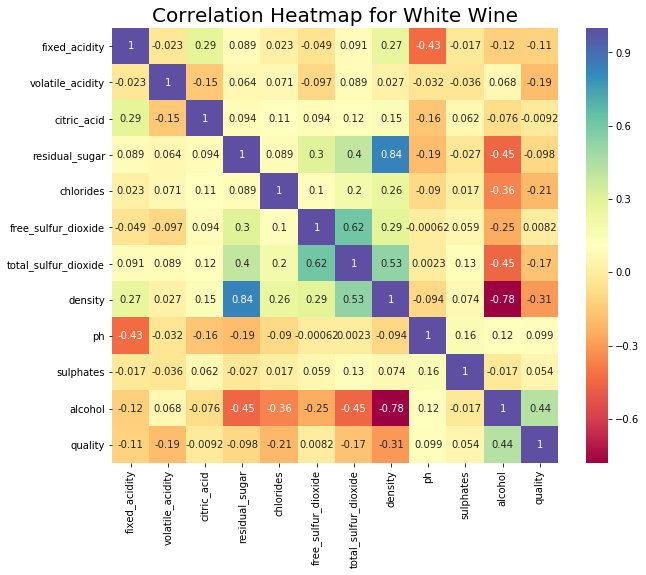

In [81]:
# see correlations of white wine features
white_wine_corr = white_wine.corr()
white_wine_corr = (white_wine_corr)
plt.figure(figsize=(10,8))
sns.heatmap(white_wine_corr, 
            xticklabels = white_wine_corr.columns.values,
            yticklabels = white_wine_corr.columns.values,
            annot=True,
            cmap = 'Spectral')
plt.title('Correlation Heatmap for White Wine', fontsize = 20)
# white_wine_corr

In [82]:
# display quality correlations in descending order
# exclude last index because quality correlates 100% with itself
print('White Wine Quality Correlations: \n')
print(white_wine_corr['quality'][:-1].sort_values(ascending = False))

White Wine Quality Correlations: 

alcohol                 0.435575
ph                      0.099427
sulphates               0.053678
free_sulfur_dioxide     0.008158
citric_acid            -0.009209
residual_sugar         -0.097577
fixed_acidity          -0.113663
total_sulfur_dioxide   -0.174737
volatile_acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


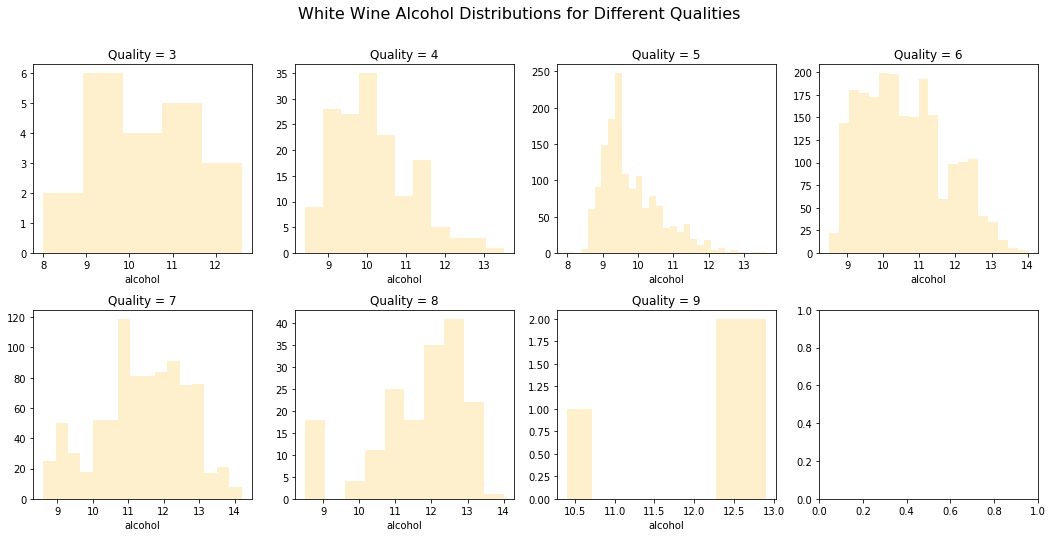

In [83]:
# comparing alcohol content in different quality white wines
white_qual_unique = np.sort(white_wine.quality.unique())
nrows = 2
ncols = 4
figures, axes = plt.subplots(nrows = nrows,ncols = ncols, figsize=(18, 8))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3)
plt.suptitle('White Wine Alcohol Distributions for Different Qualities', fontsize=16)

for qual, axis in zip(white_qual_unique, axes):
    sns.distplot(white_wine.alcohol[white_wine.quality == qual], kde = False, color=dark_yellow, ax=axis).set_title('Quality = {}'.format(str(qual)))


In [40]:
# sns.regplot(x=white_wine.alcohol, y=white_wine.quality, color = 'y')

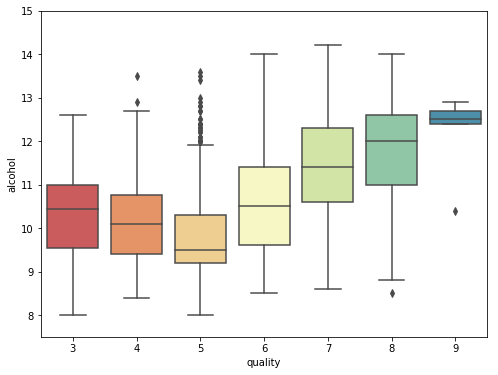

In [41]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x = white_wine.quality, y = white_wine.alcohol, palette = 'Spectral')
fig.axis(ymin=7.5, ymax=15);

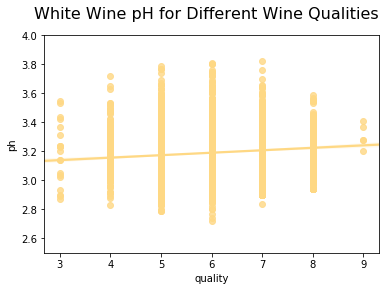

In [84]:
# white wine pH
fig = sns.regplot(x = white_wine.quality, y = white_wine.ph, color = dark_yellow)
plt.suptitle('White Wine pH for Different Wine Qualities', fontsize = 16)
fig.axis(ymin=2.5, ymax=4);

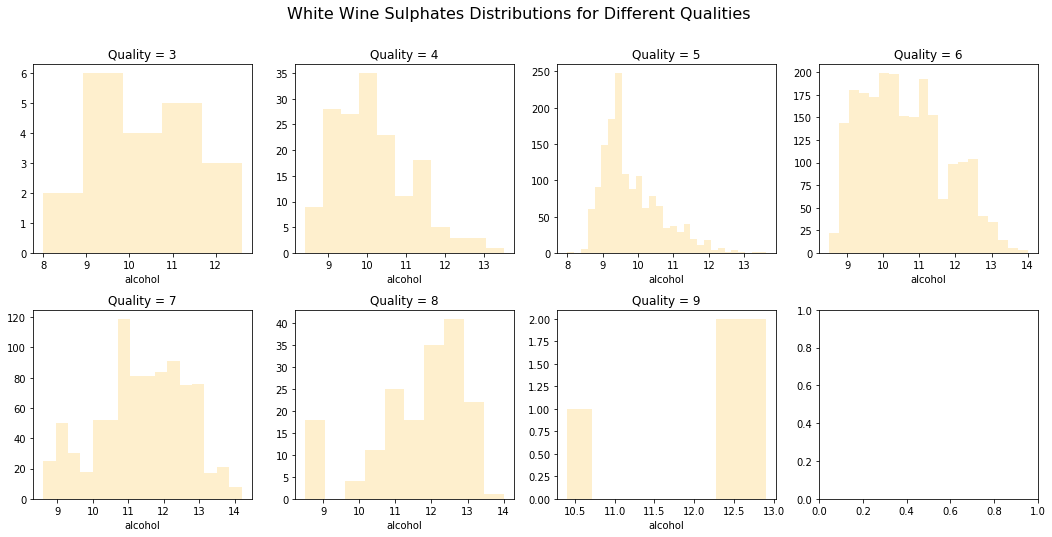

In [85]:
# comparing sulphates content in different quality whtie wines
white_qual_unique = np.sort(white_wine.quality.unique())
nrows = 2
ncols = 4
figures, axes = plt.subplots(nrows = nrows,ncols = ncols, figsize=(18, 8))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3)
plt.suptitle('White Wine Sulphates Distributions for Different Qualities', fontsize=16)

for qual, axis in zip(white_qual_unique, axes):
    sns.distplot(white_wine.alcohol[white_wine.quality == qual], kde = False, color=dark_yellow, ax=axis).set_title('Quality = {}'.format(str(qual)))

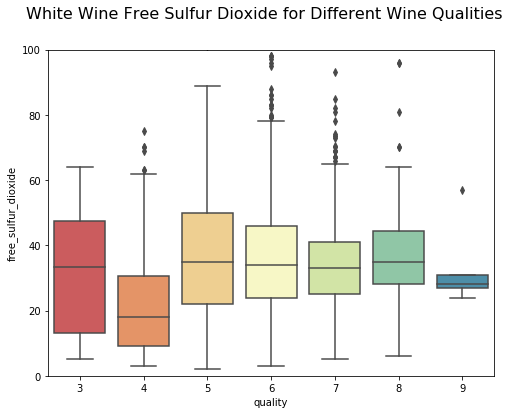

In [86]:
# white wine free_sulfur_dioxide
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x = white_wine.quality, y = white_wine.free_sulfur_dioxide, palette = 'Spectral')
plt.suptitle('White Wine Free Sulfur Dioxide for Different Wine Qualities', fontsize = 16)
fig.axis(ymin=0, ymax=100);

In [87]:
print(white_wine.groupby(white_wine.quality).quality.count())

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


In [88]:
# creating bins for 'good' and 'bad' quality wine
# White Wine: 2 bins 'bad'(quality < 6) and 'good'(6 < quality < 9)
bins_white = (2, 6, 9)

# 0 represents bad quality wines, while 1 represents good quality wines
groups = [0, 1]
white_wine.quality = pd.cut(white_wine.quality, bins = bins_white, labels = groups)

Text(0.5,1,'White Wine Quality Distribution (w/ Bins)')

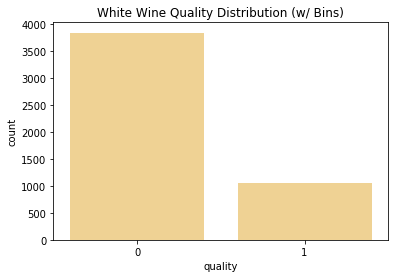

In [89]:
sns.countplot(x=white_wine.quality, color = dark_yellow).set_title('White Wine Quality Distribution (w/ Bins)')

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler

X = white_wine.drop('quality', axis =1)
y = white_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

# sc = StandardScaler()
# X_train_red = sc.fit_transform(X_train_red)
# X_test_red = sc.fit_transform(X_test_red)
# X_train_white = sc.fit_transform(X_train_white)
# X_test_white = sc.fit_transform(X_test_white)

In [91]:
def plot_2d_space(X, y, label='Classes'):   
    colors = [light_yellow, dark_yellow]
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

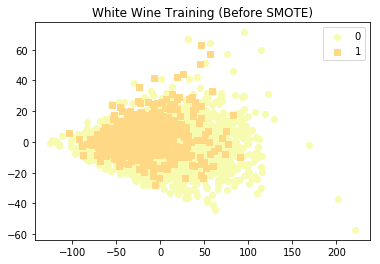

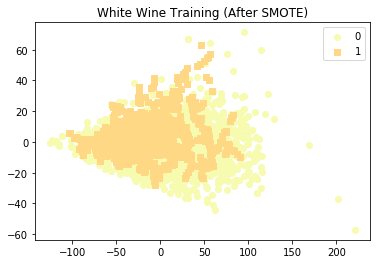

In [93]:
# since we're dealing with classification first, let's use SMOTE to balance our datasetes
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# use PCA to reduce to 2 features and visualize on 2-D graph 
pca = PCA(n_components=2)
X_train_PCA = pca.fit_transform(X_train)

smote = SMOTE(ratio='minority')
X_sm_PCA, y_sm_PCA = smote.fit_sample(X_train_PCA, y_train)

plot_2d_space(X_train_PCA, y_train, 'White Wine Training (Before SMOTE)')
plot_2d_space(X_sm_PCA, y_sm_PCA, 'White Wine Training (After SMOTE)')

In [205]:
# apply SMOTE without PCA
# smote = SMOTE(ratio='minority')
# X_train_red, y_train_red = smote.fit_sample(X_train_red, y_train_red)

In [206]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB

In [207]:
import warnings
warnings.filterwarnings(action = 'ignore')

# using k-fold cross validation to pick a model
k_fold = StratifiedKFold(n_splits = 6)

# Logistic Regression
logit_red = LogisticRegression(class_weight = 'balanced', solver = 'newton-cg', multi_class = 'multinomial')

# Random Forest
rf_red = RandomForestClassifier(class_weight = "balanced")

# SVM
svc_red = SVC(kernel='rbf', class_weight = 'balanced')

# Naive Bayes
mnb_red = GaussianNB()

clf_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']
clf_models = [logit_red, rf_red, svc_red, mnb_red]

print ("--Red Wine Cross Validation Scores-- \n")
for name, clf in zip(clf_names, clf_models):
    model = clf.fit(X_train_red, y_train_red)
    print('{}'.format(name))
    print(classification_report(y_test_red, model.predict(X_test_red)))



--Red Wine Cross Validation Scores-- 

Logistic Regression
             precision    recall  f1-score   support

          0       0.97      0.74      0.84       574
          1       0.27      0.83      0.40        66

avg / total       0.90      0.75      0.79       640

Random Forest
             precision    recall  f1-score   support

          0       0.94      0.96      0.95       574
          1       0.55      0.45      0.50        66

avg / total       0.90      0.90      0.90       640

SVM
             precision    recall  f1-score   support

          0       0.95      0.83      0.89       574
          1       0.29      0.61      0.39        66

avg / total       0.88      0.81      0.84       640

Naive Bayes
             precision    recall  f1-score   support

          0       0.96      0.80      0.88       574
          1       0.29      0.70      0.41        66

avg / total       0.89      0.79      0.83       640



In [208]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

# define baseline model
baseline = DummyClassifier(strategy = 'stratified')
baseline.fit(X_train_red, y_train_red)
y_pred = baseline.predict(X_test_red)

print('Baseline')
print(classification_report(y_test_red, model.predict(X_test_red)))


Baseline
             precision    recall  f1-score   support

          0       0.96      0.80      0.88       574
          1       0.29      0.70      0.41        66

avg / total       0.89      0.79      0.83       640



In [209]:
# let's see how our model does with all features
rf_red = RandomForestClassifier(class_weight = "balanced")
rf_red.fit(X_train_red, y_train_red)
print("--Red Wine: Random Forest--")
print(classification_report(y_test_red, rf_red.predict(X_test_red)))

--Red Wine: Random Forest--
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       574
          1       0.56      0.53      0.54        66

avg / total       0.91      0.91      0.91       640



In [210]:
# # associate labels with feature importance ratios and print in descending order
# important_features_red = pd.DataFrame(rf_red.feature_importances_,
#                                      index=X_train_red.columns,
#                                      columns = ['importance']).sort_values('importance', ascending = False)
# important_features_red = important_features_red.reset_index()
# important_features_red.rename(columns = {'index':'feature'}, inplace = True)

# f, ax = plt.subplots(figsize=(8, 6))
# sns.barplot(x = 'importance', y = 'feature', data = important_features_red, palette ='OrRd_r')
# plt.suptitle('Important Features for Red Wine', fontsize = 16)

Text(0.5,0.98,'Important Features for Red Wine (w/ NOISE)')

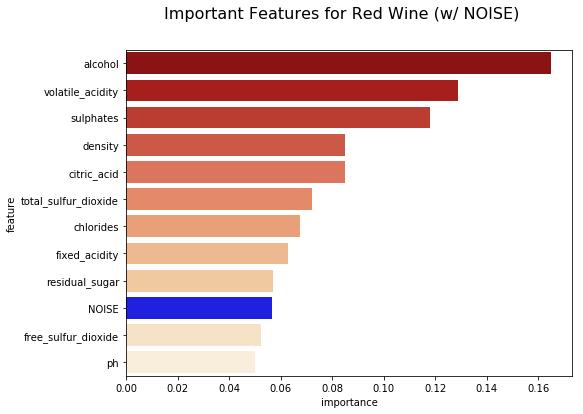

In [211]:
# train rf n_iter times to get average feature importance
avg_feature_importance = np.zeros(12)
n_iter = 100
for i in range(n_iter):
    # apply noise to dataset
    X_train_red_noise = pd.DataFrame(X_train_red).copy()
    X_train_red_noise['NOISE'] = np.random.normal(0, 1, X_train_red_noise.shape[0])

    # fit random forest model
    rf_red_noise = RandomForestClassifier()
    rf_red_noise.fit(X_train_red_noise, y_train_red)

    # get feature importance
    avg_feature_importance = np.add(avg_feature_importance, rf_red_noise.feature_importances_)

# get averge feature importance of trained rf w/ noise
avg_feature_importance = np.true_divide(avg_feature_importance, n_iter)
# print(avg_feature_importance)

# convert to df + rename cols    
important_features_red_noise = pd.DataFrame(avg_feature_importance,
                                     index = X_train_red_noise.columns,
                                     columns = ['importance']).sort_values('importance', ascending = False)
important_features_red_noise = important_features_red_noise.reset_index()
important_features_red_noise.rename(columns = {'index':'feature'}, inplace = True)  

# assign color based on feature
OrRd = sns.color_palette("OrRd_r", n_colors=len(important_features_red_noise.index))
c_palette = ['b' if ( feature == 'NOISE') else OrRd[color] for feature, color in zip(important_features_red_noise.feature, important_features_red_noise.index)]

f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x = 'importance', y = 'feature', data = important_features_red_noise, palette = c_palette)
plt.suptitle('Important Features for Red Wine (w/ NOISE)', fontsize = 16)


In [173]:
# feature reduction using EDA knowledge and important features
X_train_red.drop(['fixed_acidity', 'residual_sugar','free_sulfur_dioxide'], axis = 1)

rf_red = RandomForestClassifier(class_weight = "balanced")
rf_red.fit(X_train_red, y_train_red)
print("--Red Wine: Random Forest (Reduced Features)--")
print(classification_report(y_test_red, rf_red.predict(X_test_red)))


AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [12]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [14]:
# find best hyperparameters using Randomized Search 
from sklearn.model_selection import RandomizedSearchCV

k_fold = StratifiedKFold(n_splits = 6)
rf_red = RandomForestClassifier()
rf_random_red = RandomizedSearchCV(estimator = rf_red, param_distributions = random_grid, n_iter = 100, cv = k_fold)
# Fit the random search model
rf_random_red.fit(X_train_red, y_train_red)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=False),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_t

In [15]:
# print out best features
print(rf_random_red.best_params_)

{'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}


In [18]:
k_fold = StratifiedKFold(n_splits = 6)
rf_red = RandomForestClassifier(class_weight = "balanced", 
                                n_estimators = 1600,
                               min_samples_split = 2,
                               min_samples_leaf = 2,
                               max_features = 'auto',
                               max_depth = 30,
                               bootstrap = True)
rf_red.fit(X_train_red, y_train_red)
print("--Red Wine: Random Forest (Reduced Features)--")
results = cross_val_score(rf_red, X_train_red, y_train_red, cv=k_fold, scoring='f1_micro')
print("Random Forest F1 Micro: {:.3} ({:.3})".format(results.mean(), results.std()))
# print(classification_report(y_test_red, rf_red.predict(X_test_red)))

--Red Wine: Random Forest (Reduced Features)--
Random Forest F1 Micro: 0.654 (0.0379)


In [ ]:
# XG Boost 
# take two classes, do SMOTE classes
# majority class-> class 1, 2nd -> rest of classes OR 2nd highest classes of equal count
# read research paper -> does not suggest that oversampling/undersampling helps problem
# random forest, svm, Naive Bayes, Logistic Regression